## Project Description – Image classification using CNNs in Keras

### Context:
#### Can you differentiate a weed from a crop seedling?

#### The ability to do so effectively can mean better crop yields and better stewardship of the environment.
#### The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

#### Objective:
#### To implement the techniques learnt as a part of the course.
#### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.


#### Guide to solve the project seamlessly:
#### Here are the points which will help you to solve the problem efficiently:
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

#### Steps and tasks:

###### 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

###### 2. Data Pre-processing: (15 Marks)
- Normalization.
- Gaussian Blurring.
- Visualize data after pre-processing.

###### 3. Make data compatible: (10 Marks)
- Convert labels to one-hot-vectors.
- Print the label for y_train[0].
- Split the dataset into training, testing, and validation set. (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
- Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

###### 4. Building CNN: (15 Marks)
- Define layers.
- Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

###### 5. Fit and evaluate model and print confusion matrix. (10 Marks)

###### 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [1]:
#Import the libraries,
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import math
from mpl_toolkits.axes_grid1 import ImageGrid

import os
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D,
    GlobalMaxPooling2D,BatchNormalization)
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

show_plots = True # set False to reduce notebook running time
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model

In [2]:
#Load the image file of 
DS_IMG = np.load('images.npy')

#Load the labels file of 
DS_LBL = pd.read_csv('Labels.csv')

#Print the shape of Images and labels to ensure the dataset is loaded properly. 
print(DS_IMG.shape)
print(DS_LBL.shape) 


(4750, 128, 128, 3)
(4750, 1)


In [3]:
#Different species in the data set
DS_UN_LBL = DS_LBL['Label'].unique()
COUNT_species = len(DS_UN_LBL)

print(DS_UN_LBL)

['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


Image name:Small-flowered Cranesbill


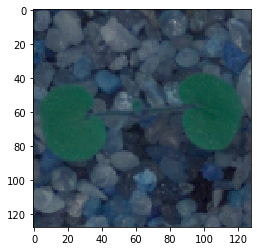

In [4]:
# Check Images

i = 0
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Fat Hen


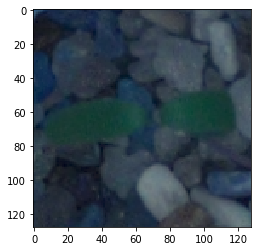

In [5]:
# Check Images

i = 498
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Shepherds Purse


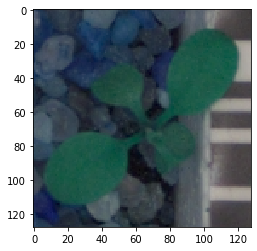

In [6]:
# Check Images

i = 973
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Common wheat


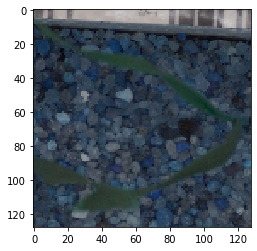

In [7]:
# Check Images

i = 1204
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Common Chickweed


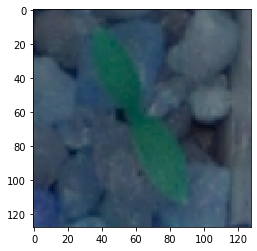

In [8]:
# Check Images

i = 1425
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Charlock


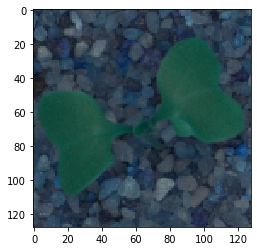

In [9]:
# Check Images

i = 2036
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Cleavers


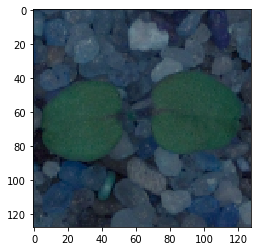

In [10]:
# Check Images

i = 2426
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Scentless Mayweed


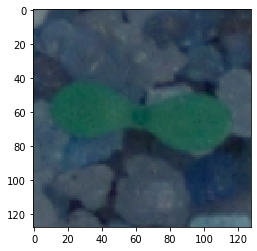

In [11]:
# Check Images

i = 2713
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Sugar beet


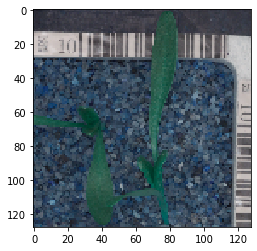

In [12]:
# Check Images

i = 3229
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Maize


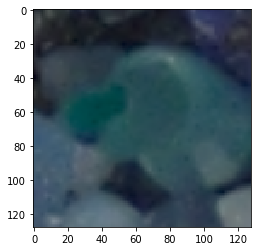

In [13]:
# Check Images

i = 3614
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Black-grass


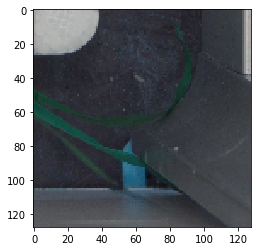

In [14]:
# Check Images

i = 3835
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

Image name:Loose Silky-bent


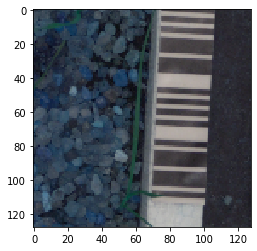

In [15]:
# Check Images

i = 4098
img = DS_IMG[i]
label = DS_LBL['Label'][i]
plt.imshow(img)
print(f'Image name:{label}')

#### 2. Data Pre-processing: (15 Marks)

In [16]:
DS_IMG = DS_IMG.astype('float32')
DS_IMG /= 255
# Check the nomalized data
print(f'Shape of the Train array:{DS_IMG.shape}')
print(f'Minimum value in the Train Array:{DS_IMG.min()}')
print(f'Maximum value in the Train Array:{DS_IMG.max()}')

Shape of the Train array:(4750, 128, 128, 3)
Minimum value in the Train Array:0.0
Maximum value in the Train Array:1.0


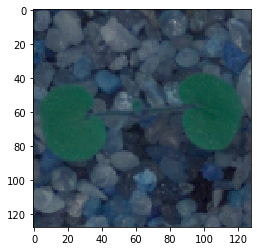

In [17]:
#Gaussian Blurring
#Image before Gaussian Blurring

plt.imshow(DS_IMG[0], cmap='gray')

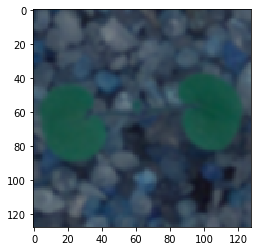

In [18]:
#After applying Gaussian Blurring

plt.imshow(cv2.GaussianBlur(DS_IMG[0], (5,5), 0))

In [19]:
#Applying Gaussian Blurring on all the data set

for idx, img in enumerate(DS_IMG):
  DS_IMG[idx] = cv2.GaussianBlur(img, (5, 5), 0)

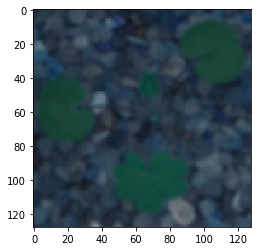

In [20]:
#Visualizing data after pre-processing.

plt.imshow(DS_IMG[1], cmap='gray')

#### 3. Make data compatible: (10 Marks)

In [21]:
#Split the dataset into training, testing, and validation set. (Hint: First split images and labels into training and testing set with test_size = 0.3. 

X_train, X_test, y_train, y_test = train_test_split(DS_IMG, DS_LBL, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((3325, 128, 128, 3), (1425, 128, 128, 3))

In [22]:
#Then further split test data into test and validation set with test_size = 0.5)

X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
X_test.shape, X_validation.shape

((712, 128, 128, 3), (713, 128, 128, 3))

In [23]:
#Convert labels to one-hot-vectors.

encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_validation = encoder.fit_transform(y_validation)

In [24]:
#Print the label for y_train[0].
y_train[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 4. Building CNN: (15 Marks)

In [25]:
def create_model(input_shape, num_classes):
  # Initialize CNN Classified
  model = Sequential()

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(32, (3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Add convolution layer with 32 filters and 3 kernels
  model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(rate=0.25))

  # Flatten the 2D array to 1D array
  model.add(Flatten())

  # Create fully connected layers with 512 units
  model.add(Dense(512, activation=tf.nn.relu))
  model.add(Dropout(0.5))


  # Adding a fully connected layer with 128 neurons
  model.add(Dense(units = 128, activation = tf.nn.relu))
  model.add(Dropout(0.5))

  # The final output layer with 12 neurons to predict the categorical classifcation
  model.add(Dense(units = num_classes, activation = tf.nn.softmax))
  return model

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=10)

In [27]:
input_shape = X_train.shape[1:] # Input shape of X_train
num_classes = y_train.shape[1] # Target column size

model = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizer
# optimizer = tf.keras.optimizers.SGD(lr=1 * 1e-1, momentum=0.9, nesterov=True)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=30, batch_size=100, callbacks=[callbacks])

Train on 3325 samples, validate on 713 samples
Epoch 1/30
3325/3325 [==============================] - 28s 8ms/sample - loss: 2.4517 - accuracy: 0.1269 - val_loss: 2.4196 - val_accuracy: 0.1346
Epoch 2/30
3325/3325 [==============================] - 27s 8ms/sample - loss: 2.4340 - accuracy: 0.1284 - val_loss: 2.4176 - val_accuracy: 0.1346
Epoch 3/30
3325/3325 [==============================] - 27s 8ms/sample - loss: 2.4232 - accuracy: 0.1371 - val_loss: 2.3929 - val_accuracy: 0.2426
Epoch 4/30
3325/3325 [==============================] - 27s 8ms/sample - loss: 2.2630 - accuracy: 0.2403 - val_loss: 1.9253 - val_accuracy: 0.3815
Epoch 5/30
3325/3325 [==============================] - 27s 8ms/sample - loss: 1.8935 - accuracy: 0.3708 - val_loss: 1.5913 - val_accuracy: 0.4586
Epoch 6/30
3325/3325 [==============================] - 27s 8ms/sample - loss: 1.6736 - accuracy: 0.4114 - val_loss: 1.4977 - val_accuracy: 0.5203
Epoch 7/30
3325/3325 [==============================] - 28s 8ms/sample 

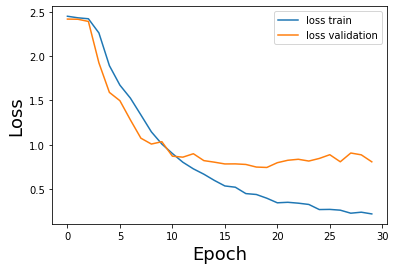

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('loss train','loss validation'), loc=0)

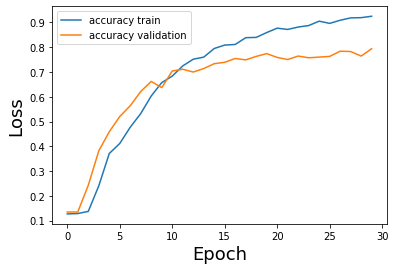

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel(r'Loss', fontsize=18)
plt.legend(('accuracy train','accuracy validation'), loc=0)

#### 5. Fit and evaluate model and print confusion matrix. (10 Marks)

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss: {:.2f} \nTest accuracy: {:.2f}'.format(loss, accuracy))

712/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.73 
Test accuracy: 0.81


In [32]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss: {:.2f} \nTrain accuracy: {:.2f}'.format(loss, accuracy))

3325/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train loss: 0.07 
Train accuracy: 0.98


##### Note: If the model performs better on the training set than on the test set, it means that the model is likely overfitting. In this case 
- Training accuracy is 98%
- Testing accuracy is 81%


In [33]:
Second_It_Model = create_model(input_shape, num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Optimizer

Second_It_Model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Second_It_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)       

In [34]:
history = Second_It_Model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=18, callbacks=[callbacks])

Train on 3325 samples, validate on 713 samples
Epoch 1/18
3325/3325 [==============================] - 29s 9ms/sample - loss: 2.4112 - accuracy: 0.1552 - val_loss: 2.1270 - val_accuracy: 0.2819
Epoch 2/18
3325/3325 [==============================] - 28s 8ms/sample - loss: 1.9332 - accuracy: 0.3392 - val_loss: 1.5933 - val_accuracy: 0.4516
Epoch 3/18
3325/3325 [==============================] - 29s 9ms/sample - loss: 1.6586 - accuracy: 0.4292 - val_loss: 1.4010 - val_accuracy: 0.5273
Epoch 4/18
3325/3325 [==============================] - 29s 9ms/sample - loss: 1.4447 - accuracy: 0.4956 - val_loss: 1.1790 - val_accuracy: 0.6003
Epoch 5/18
3325/3325 [==============================] - 29s 9ms/sample - loss: 1.2737 - accuracy: 0.5567 - val_loss: 1.0791 - val_accuracy: 0.6381
Epoch 6/18
3325/3325 [==============================] - 29s 9ms/sample - loss: 1.1234 - accuracy: 0.6141 - val_loss: 0.9572 - val_accuracy: 0.6872
Epoch 7/18
3325/3325 [==============================] - 29s 9ms/sample 

In [35]:
loss, accuracy = Second_It_Model.evaluate(X_test, y_test)
print('Test loss: {:.2f} \nTest accuracy: {:.2f}'.format(loss, accuracy))

712/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test loss: 0.79 
Test accuracy: 0.78


In [36]:
loss, accuracy = Second_It_Model.evaluate(X_train, y_train)
print('Train loss: {:.2f} \nTrain accuracy: {:.2f}'.format(loss, accuracy))

3325/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train loss: 0.21 
Train accuracy: 0.93


In [37]:
y_pred = Second_It_Model.predict(X_test)
y_pred = (y_pred > 0.5) 

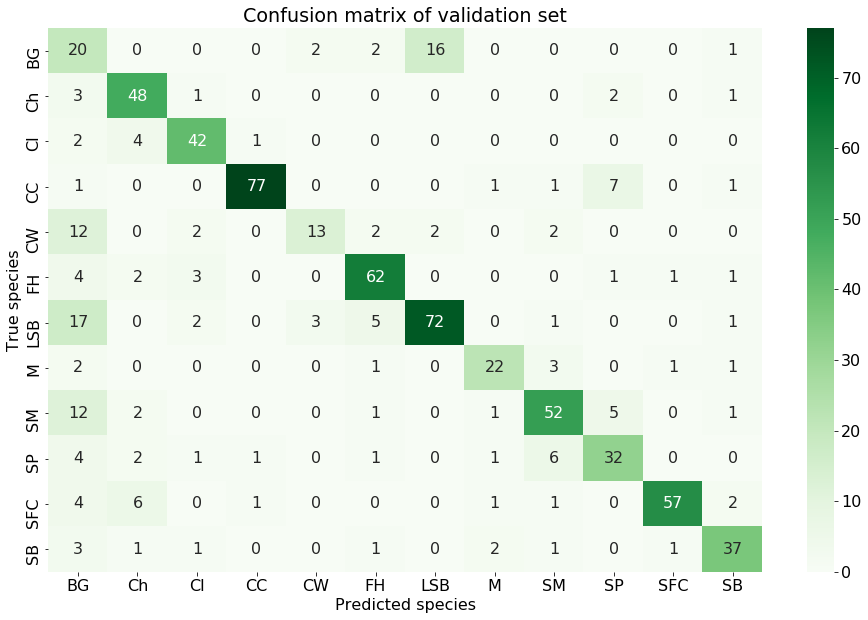

In [38]:
#plot_confusion(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 16

if show_plots:
    
    cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']
    pd.DataFrame({'class': DS_UN_LBL, 'abbreviation': abbreviation})

    fig, ax = plt.subplots(1)
    ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
    ax.set_xticklabels(abbreviation)
    ax.set_yticklabels(abbreviation)
    plt.title('Confusion matrix of validation set')
    plt.ylabel('True species')
    plt.xlabel('Predicted species')
    plt.show();


In [39]:
print("Classification")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

Classification
              precision    recall  f1-score   support

           0       0.24      0.49      0.32        41
           1       0.74      0.87      0.80        55
           2       0.81      0.86      0.83        49
           3       0.96      0.88      0.92        88
           4       0.72      0.39      0.51        33
           5       0.83      0.84      0.83        74
           6       0.80      0.71      0.75       101
           7       0.79      0.73      0.76        30
           8       0.78      0.70      0.74        74
           9       0.68      0.67      0.67        48
          10       0.95      0.79      0.86        72
          11       0.80      0.79      0.80        47

    accuracy                           0.75       712
   macro avg       0.76      0.73      0.73       712
weighted avg       0.79      0.75      0.76       712



In [40]:
y_pred = encoder.inverse_transform(y_pred)

#### 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

Prediction: Black-grass


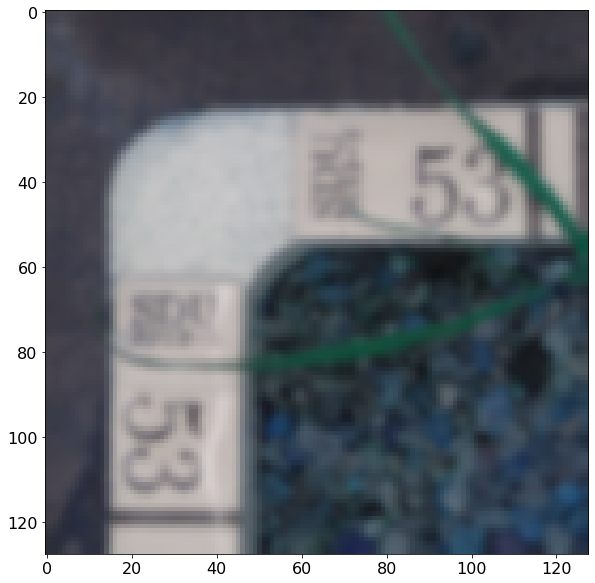

In [41]:
ind = 2
plt.imshow(X_test[ind], cmap='gray')
print("Prediction:", y_pred[ind])

Prediction: Common Chickweed


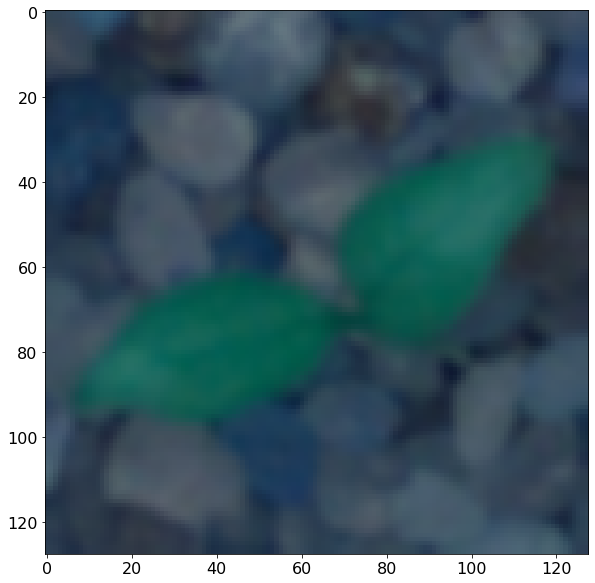

In [42]:
ind = 3
plt.imshow(X_test[ind], cmap='gray')
print("Prediction:", y_pred[ind])

Prediction: Black-grass


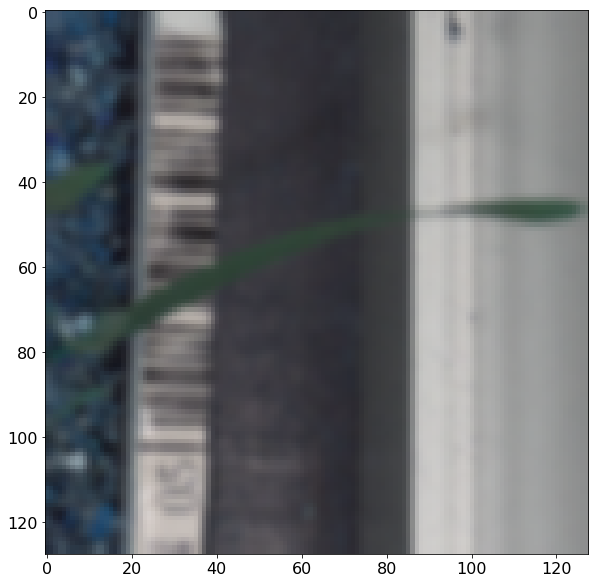

In [43]:
ind = 33
plt.imshow(X_test[ind], cmap='gray')
print("Prediction:", y_pred[ind])

Prediction: Black-grass


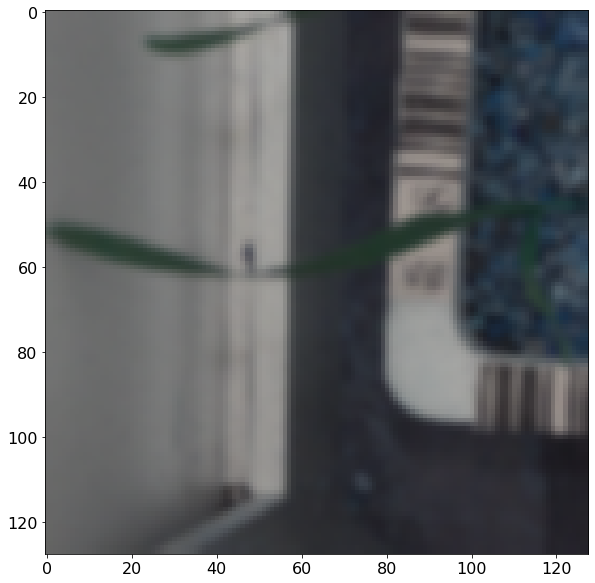

In [44]:
ind = 36
plt.imshow(X_test[ind], cmap='gray')
print("Prediction:", y_pred[ind])

Prediction: Small-flowered Cranesbill


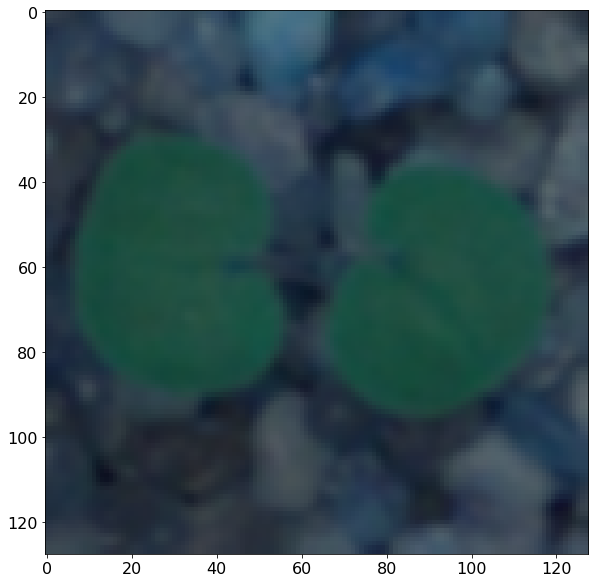

In [45]:
ind = 59
plt.imshow(X_test[ind], cmap='gray')
print("Prediction:", y_pred[ind])